<img src="assets/logo.png" alt="Drawing" style="width: 300px;"/>

# Origem dos dados

Esta base de dados faz parte do projeto de Business Case da Hype para a vaga de Estágio em Dados. Todos os dados expostos são fictícios.

# Observações
* Acme precisa identificar quais funções podem ser otimizadas pelo departamento de Desenvolvimento
* Foi considerado que uma função não otimizada é aquela que possui alta variação em tempo de execução em relação à média dos tempos de execução, desde que ela não acesse algum sistema externo.

# Perguntas que serão respondidas com base na análise:

* A) Identificar quais funções precisam ser revisadas. Será considerado 30% como o limite de tolerância para a variação em relação à média e que todas as funções que estiverem além deste limite precisam ser revisadas.
* B) Mostrar um gráfico que apresenta a variação ao longo do tempo, a média, os limites de tolerância e os pontos nos meses em que a variação passa do limite de forma diferenciada.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings
sns.set()
sns.set_theme(style="whitegrid")

df = pd.read_csv('executions.csv',index_col= None)
df_func = pd.read_csv('functions.csv', index_col=0)

# Agora que os dados estão carregados, mudanças serão feitas:
* Verificar como os dados estão catalogados.
* Criar uma nova coluna com o tempo de execução da função real, desconsiderando o tempo médio de latência caso a função utilize componentes externos.
* Extrair as médias e o intervalo de tolerância aceitável para identificar quais funções devem ser otimizadas.

In [2]:
df.head()

,id,date,function_id,execution_time
0,6491,2020-05-27,2,373
1,12540,2020-02-08,4,5806
2,17756,2020-04-19,5,154
3,15598,2020-08-26,5,149
4,5916,2020-01-20,1,257


In [3]:
df_func.head(6)

,function_name,external_component_avg_latency,has_external_component
id,,,
0,checkSomething,0,False
1,doThisThing,30,True
2,doThatThing,0,False
3,accessAnotherThing,1000,True
4,sendAFile,2500,True
5,fetchThisMetadata,20,True


Aqui verifica-se como o Python está tratando esses dados, ou seja, se há algum formato incoerente.

In [4]:
df.dtypes

id                 int64
date              object
function_id        int64
execution_time     int64
dtype: object

# Limpeza de dados:
A coluna `id` não está em ordem, por isso foi retirada. 

In [5]:
def get_function_latency(id):
    return df_func.external_component_avg_latency[id] 

Essa função acima tem como propósito apenas retornar o valor da latência externa média.

In [6]:
df['real_exe_time'] = df.execution_time - df.function_id.apply(get_function_latency)
df.drop(['id','execution_time'], axis=1, inplace = True)
df.head()

,date,function_id,real_exe_time
0,2020-05-27,2,373
1,2020-02-08,4,3306
2,2020-04-19,5,134
3,2020-08-26,5,129
4,2020-01-20,1,227


Uma vez com o resultado do real tempo de execução da função(desconsiderando fatores externos) foram criadas as duas funções abaixo, a função `get_function_data` retorna ou o dataframe da função selecionada ou os valores da média, os invervalos(média + 30% e média - 30%) e os valores máximo e mínimo.  

A função `date_to_monthName` será usada logo adiante para a visualização dos dados.

In [7]:
def get_function_data(dataframe,function_id, get_df = False):
    df_test = dataframe.copy()
    df_test = df_test.loc[df_test['function_id'] == function_id]
    df_test.sort_values(by = ['date'], inplace= True)
    if get_df:
        return df_test
    else:
        df = {'function_id': function_id, 'mean': df_test.mean(), 
             'mean+30%':(round(df_test.mean()*1.3)),'mean-30%':(round(df_test.mean()*0.7)),
             'min': df_test.min(),'max':df_test.max()
            }
        df_results = pd.DataFrame(data=df)
        df_results.drop(['date', 'function_id'], inplace = True)
        return df_results
    
def date_to_monthName(df):
    for index in df.index:
        if '2020-01-01' <=df.loc[index,'date'] <= '2020-01-31':
            df.loc[index,'date'] = 'Jan'
        elif '2020-02-01' <=df.loc[index,'date'] <= '2020-02-31':
            df.loc[index,'date'] = 'Fev'
        elif '2020-03-01' <=df.loc[index,'date'] <= '2020-03-31':
            df.loc[index,'date'] = 'Mar'
        elif '2020-04-01' <=df.loc[index,'date'] <= '2020-04-31':
            df.loc[index,'date'] = 'Abr'
        elif '2020-05-01' <=df.loc[index,'date'] <= '2020-05-31':
            df.loc[index,'date'] = 'Mai'
        elif '2020-06-01' <=df.loc[index,'date'] <= '2020-06-31':
            df.loc[index,'date'] = 'Jun'
        elif '2020-07-01' <=df.loc[index,'date'] <= '2020-07-31':
            df.loc[index,'date'] = 'Jul'
        elif '2020-08-01' <=df.loc[index,'date'] <= '2020-08-31':
            df.loc[index,'date'] = 'Ago'
        elif '2020-09-01' <=df.loc[index,'date'] <= '2020-09-31':
            df.loc[index,'date'] = 'Set'
        elif '2020-10-01' <=df.loc[index,'date'] <= '2020-10-31':
            df.loc[index,'date'] = 'Out'
        elif '2020-11-01' <=df.loc[index,'date'] <= '2020-11-31':
            df.loc[index,'date'] = 'Nov'
        else:
            df.loc[index,'date'] = 'Dez'

In [8]:
d = [get_function_data(df,0),
      get_function_data(df,1),
      get_function_data(df,2),
      get_function_data(df,3),
      get_function_data(df,4),
      get_function_data(df,5)]
results = pd.concat(d)

In [9]:
results.head(6)

,function_id,mean,mean+30%,mean-30%,min,max
real_exe_time,0,66.107667,86.0,46.0,49,85
real_exe_time,1,223.987667,291.0,157.0,211,235
real_exe_time,2,329.945333,429.0,231.0,256,408
real_exe_time,3,33.140000,43.0,23.0,17,50
real_exe_time,4,3301.949333,4293.0,2311.0,2940,3698
real_exe_time,5,132.090667,172.0,92.0,93,170


Conforme visto acima, apenas a função 3 extrapola o limite aceitável

In [10]:
df_inc = get_function_data(df, 3, get_df = True)
df_inc.head()

,date,function_id,real_exe_time
15597,2020-01-01,3,31
9117,2020-01-01,3,30
510,2020-01-01,3,33
15070,2020-01-02,3,38
11651,2020-01-02,3,36


Foi criado um novo dataset com apenas os dados da função 3, agrupados pela data.

In [11]:
date_to_monthName(df_inc)
df_inc.reset_index(inplace=True) 
df_inc.drop(columns=['index'], inplace= True)

df_inc.head()

,date,function_id,real_exe_time
0,Jan,3,31
1,Jan,3,30
2,Jan,3,33
3,Jan,3,38
4,Jan,3,36


Alterando a data para os nomes do mês para plotar o gráfico em seguida.

# Data Visualization

Como os dados vão ser plotados ao longo do tempo foi criado um dataset auxiliar na plotagem do gráfico.

In [12]:
df_agg = df_inc.groupby("date")["real_exe_time"].agg(mean="mean").reset_index()
df_agg["mean+30%"] = df_agg["mean"] * 1.3
df_agg["mean-30%"] = df_agg["mean"] * 0.7
df_agg.head()

,date,mean,mean+30%,mean-30%
0,Abr,33.436441,43.467373,23.405508
1,Ago,33.119048,43.054762,23.183333
2,Dez,33.222222,43.188889,23.255556
3,Fev,33.240506,43.212658,23.268354
4,Jan,32.740458,42.562595,22.918321


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


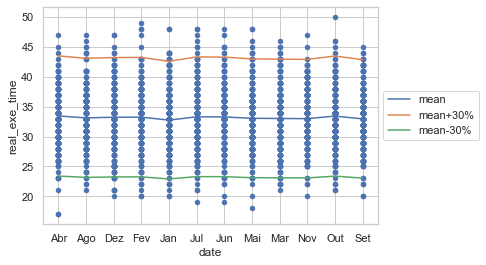

In [14]:
warnings.filterwarnings(action='once')
ax = df_inc.plot.scatter(x = 'date', y = 'real_exe_time')
df_agg.plot(x='date', y=['mean','mean+30%','mean-30%'], ax=ax)

plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

Como é perceptível, a função 3 varía muito em relação a média em todos os meses do ano.

# Resultados e conclusões:
* Dentre as 6 funções, apenas a função 3 `accessAnotherThing` vária em relação a média.
* A função 3 tende a variar ao longo de **todos** os meses, portanto convém ao departamento de Desenvolvimento otimiza-la.